In [334]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

In [335]:
spark_df = spark.read.csv('Database/CardiovascularDisease/CVD_unclean.csv', header=True)

In [336]:
from pyspark.sql.functions import col

spark_df = spark_df.withColumn("Alcohol_Consumption", col("Alcohol_Consumption").cast("int"))
spark_df = spark_df.withColumn("Height_(cm)", col("Height_(cm)").cast("int"))
spark_df = spark_df.withColumn("Weight_(kg)", col("Weight_(kg)").cast("float"))
spark_df = spark_df.withColumn("BMI", col("BMI").cast("float"))
spark_df = spark_df.withColumn("Height_(cm)", col("Height_(cm)").cast("int"))
spark_df = spark_df.withColumn("Fruit_Consumption", col("Fruit_Consumption").cast("int"))
spark_df = spark_df.withColumn("Green_Vegetables_Consumption", col("Green_Vegetables_Consumption").cast("int"))
spark_df = spark_df.withColumn("FriedPotato_Consumption", col("FriedPotato_Consumption").cast("int"))

spark_df.show(5)

+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+
|General_Health|             Checkup|Exercise|Heart_Disease|Skin_Cancer|Other_Cancer|Depression|Diabetes|Arthritis|   Sex|Age_Category|Height_(cm)|Weight_(kg)|  BMI|Smoking_History|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|
+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+
|          Poor|Within the past 2...|      No|           No|         No|          No|        No|      No|      Yes|Female|       70-74|        150|      32.66|14.54|            Yes|

In [337]:
from pyspark.sql.functions import col, sum
spark_cleaned_df = spark_df.na.drop()
null_counts = spark_cleaned_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in spark_cleaned_df.columns])

null_counts.show()

+--------------+-------+--------+-------------+-----------+------------+----------+--------+---------+---+------------+-----------+-----------+---+---------------+-------------------+-----------------+----------------------------+-----------------------+
|General_Health|Checkup|Exercise|Heart_Disease|Skin_Cancer|Other_Cancer|Depression|Diabetes|Arthritis|Sex|Age_Category|Height_(cm)|Weight_(kg)|BMI|Smoking_History|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|
+--------------+-------+--------+-------------+-----------+------------+----------+--------+---------+---+------------+-----------+-----------+---+---------------+-------------------+-----------------+----------------------------+-----------------------+
|             0|      0|       0|            0|          0|           0|         0|       0|        0|  0|           0|          0|          0|  0|              0|                  0|                0|                           0|     

In [338]:
from pyspark.sql.functions import when, col

# Construct the Health_Status
spark_cleaned_constructed_df = spark_cleaned_df.withColumn(
  'Health_Status',
  when(col('BMI') < 18.5, "Underweight")
  .when((col('BMI') >= 18.5) & (col('BMI') <= 24.9), "Normal")
  .when((col('BMI') >= 25) & (col('BMI') <= 29.9), "Overweight")
  .otherwise("Obese")
)


# Construct the Alcohol_Consumption_Status
spark_cleaned_constructed_df = spark_cleaned_constructed_df.withColumn(
  'Alcohol_Consumption_Status',
  when(col('Alcohol_Consumption') == 0 , "Zero Alcohol Consumption")
  .when(col('Alcohol_Consumption') <= 7.5 , "Low Alcohol Consumption")
  .when((col('Alcohol_Consumption') > 7.5) & (col('Alcohol_Consumption') <= 15),"Medium Alcohol Consumption")
  .when((col('Alcohol_Consumption') > 15) & (col('Alcohol_Consumption') <= 22.5), "High Alcohol Consumption")
  .otherwise("Excess Alcohol Consumption")
)

# Construct the Fruit_Consumption_Status
spark_cleaned_constructed_df = spark_cleaned_constructed_df.withColumn(
  'Fruit_Consumption_Status',
  when(col('Fruit_Consumption') == 0 , "Zero Fruit Consumption")
  .when(col('Fruit_Consumption') <= 30 , "Low Fruit Consumption")
  .when((col('Fruit_Consumption') > 30) & (col('Fruit_Consumption') <= 60),"Medium Fruit Consumption")
  .when((col('Fruit_Consumption') > 60) & (col('Fruit_Consumption') <= 90), "High Fruit Consumption")
  .otherwise("Excess Fruit Consumption")
)

# Construct the FriedPotato_Consumption_Status
spark_cleaned_constructed_df = spark_cleaned_constructed_df.withColumn(
  'FriedPotato_Consumption_Status',
  when(col('FriedPotato_Consumption') == 0 , "Zero Fried Potato Consumption")
  .when(col('FriedPotato_Consumption') <= 30 , "Low Fried Potato Consumption")
  .when((col('FriedPotato_Consumption') > 30) & (col('FriedPotato_Consumption') <= 60),"Medium Fried Potato Consumption")
  .when((col('FriedPotato_Consumption') > 60) & (col('FriedPotato_Consumption') <= 90), "High Fried Potato Consumption")
  .otherwise("Excess Fried Potato Consumption")
)

# Construct the Green_Vegetables_Consumption_Status
spark_cleaned_constructed_df = spark_cleaned_constructed_df.withColumn(
  'Green_Vegetables_Consumption_Status',
  when(col('Green_Vegetables_Consumption') == 0 , "Zero Green Vegetable Consumption")
  .when(col('Green_Vegetables_Consumption') <= 30 , "Low Green Vegetable Consumption")
  .when((col('Green_Vegetables_Consumption') > 30) & (col('Green_Vegetables_Consumption') <= 60),"Medium Green Vegetable Consumption")
  .when((col('Green_Vegetables_Consumption') > 60) & (col('Green_Vegetables_Consumption') <= 90), "High Green Vegetable Consumption")
  .otherwise("Excess Green Vegetable Consumption")
)

spark_cleaned_constructed_df.show(5)

+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+-------------+--------------------------+------------------------+------------------------------+-----------------------------------+
|General_Health|             Checkup|Exercise|Heart_Disease|Skin_Cancer|Other_Cancer|Depression|Diabetes|Arthritis|   Sex|Age_Category|Height_(cm)|Weight_(kg)|  BMI|Smoking_History|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|Health_Status|Alcohol_Consumption_Status|Fruit_Consumption_Status|FriedPotato_Consumption_Status|Green_Vegetables_Consumption_Status|
+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+-----------+-----------+-----+---------------+-------

In [339]:
# Drop useless variable

# BMI is better than weight and height
spark_cleaned_constructed_df = spark_cleaned_constructed_df.drop(col('Weight_(kg)'))
spark_cleaned_constructed_df = spark_cleaned_constructed_df.drop(col('Height_(cm)'))

spark_cleaned_constructed_df = spark_cleaned_constructed_df.drop(col('Alcohol_Consumption'))
spark_cleaned_constructed_df = spark_cleaned_constructed_df.drop(col('BMI'))
spark_cleaned_constructed_df = spark_cleaned_constructed_df.drop(col('Fruit_Consumption'))
spark_cleaned_constructed_df = spark_cleaned_constructed_df.drop(col('FriedPotato_Consumption'))
spark_cleaned_constructed_df = spark_cleaned_constructed_df.drop(col('Green_Vegetables_Consumption'))

spark_cleaned_constructed_df.show(5)

+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+---------------+-------------+--------------------------+------------------------+------------------------------+-----------------------------------+
|General_Health|             Checkup|Exercise|Heart_Disease|Skin_Cancer|Other_Cancer|Depression|Diabetes|Arthritis|   Sex|Age_Category|Smoking_History|Health_Status|Alcohol_Consumption_Status|Fruit_Consumption_Status|FriedPotato_Consumption_Status|Green_Vegetables_Consumption_Status|
+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+---------------+-------------+--------------------------+------------------------+------------------------------+-----------------------------------+
|          Poor|Within the past 2...|      No|           No|         No|          No|        No|      No|      Yes|Female|       70-74|          

<AxesSubplot:ylabel='Heart_Disease'>

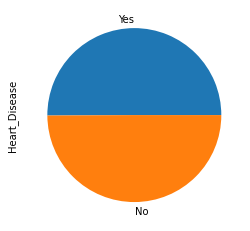

In [340]:
# under-sampling method 
count_class_0 = spark_cleaned_constructed_df.filter(spark_cleaned_constructed_df['Heart_Disease'] == "Yes").count()
count_class_1 = spark_cleaned_constructed_df.filter(spark_cleaned_constructed_df['Heart_Disease'] == "No").count()


fraction = count_class_0 / float(count_class_1)
df_class_1_under = spark_cleaned_constructed_df.filter(spark_cleaned_constructed_df['Heart_Disease'] == "No").sample(False, fraction)
df_balanced = df_class_1_under.unionAll(spark_cleaned_constructed_df.filter(spark_cleaned_constructed_df['Heart_Disease'] == "Yes"))

df_balanced_pandas = df_balanced.toPandas()
df_balanced_pandas['Heart_Disease'].value_counts().plot.pie()

In [341]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import LogisticRegression


In [342]:
df_balanced = df_balanced.withColumn("Heart_Disease", 
                   when(col("Heart_Disease") == "Yes", 1)
                   .when(col("Heart_Disease") == "No", 0)
                   .cast('int')
                   )

indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df_balanced) for column in df_balanced.columns]
encoders = [OneHotEncoder(inputCol=column+"_index", outputCol=column+"_vec") for column in df_balanced.columns]

assembler = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders], outputCol="features")



In [343]:
categorical_columns = [i for i in df_balanced.columns if i != "Heart_Disease"]
log_reg = LogisticRegression(featuresCol='features', labelCol='Heart_Disease')
pipeline = Pipeline(stages=indexers + encoders + [assembler, log_reg])

train_data, test_data = df_balanced.randomSplit([0.7,.3])
fit_model = pipeline.fit(train_data)
results = fit_model.transform(test_data)

In [344]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import classification_report

evaluator = MulticlassClassificationEvaluator(labelCol="Heart_Disease", predictionCol="prediction", metricName="accuracy")
train_results = fit_model.transform(train_data)
train_accuracy = evaluator.evaluate(train_results)


print("Train set accuracy: ", train_accuracy)
test_accuracy = evaluator.evaluate(results)
print("Test set accuracy: ", test_accuracy)


# convert to Pandas DataFrame
y_true = results.select("Heart_Disease").toPandas()
y_pred = results.select("prediction").toPandas()

# use classification_report from scikit-learn to generate report.
print(classification_report(y_true, y_pred))


Train set accuracy:  1.0


Test set accuracy:  1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7510
           1       1.00      1.00      1.00      7455

    accuracy                           1.00     14965
   macro avg       1.00      1.00      1.00     14965
weighted avg       1.00      1.00      1.00     14965



In [345]:
# 8.4 evaluate model 
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics
import matplotlib.pyplot as plt

# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="Heart_Disease")
roc_auc = evaluator.evaluate(results, {evaluator.metricName: "areaUnderROC"})
print(f"Area under ROC curve: {roc_auc}")

# Get FPR and TPR
results_rdd = results.select(['probability', 'Heart_Disease']) \
    .rdd.map(lambda row: (float(row['probability'][1]), float(row['Heart_Disease'])))
metrics = BinaryClassificationMetrics(results_rdd)

fpr = dict()
tpr = dict()
roc_auc = dict()

y_test = results.select('Heart_Disease').rdd.flatMap(lambda x: x).collect()
y_score = results.select('probability').rdd.map(lambda x: x['probability'][1]).collect()

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# drow ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()


Area under ROC curve: 0.9999998035259939


/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
df_balanced.columns

['General_Health',
 'Checkup',
 'Exercise',
 'Heart_Disease',
 'Skin_Cancer',
 'Other_Cancer',
 'Depression',
 'Diabetes',
 'Arthritis',
 'Sex',
 'Age_Category',
 'Smoking_History',
 'Health_Status',
 'Alcohol_Consumption_Status',
 'Fruit_Consumption_Status',
 'FriedPotato_Consumption_Status',
 'Green_Vegetables_Consumption_Status']

In [ ]:
from pyspark.ml.fpm import FPGrowth
from pyspark.sql.functions import array, array_distinct
from pyspark.sql import functions as F

df_as_list = df_balanced.withColumn("items", array(
 df_balanced.columns
  ))
# Remove duplicates from the array
df_as_list = df_as_list.withColumn("items", array_distinct("items"))

df_as_list = df_as_list.select("items")

fpGrowth = FPGrowth(itemsCol="items", minSupport=0.1, minConfidence=0.5)

model = fpGrowth.fit(df_as_list)

model.associationRules.show(5)



/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+-----------+--------------------+------------------+------------------+-------------------+
| antecedent|          consequent|        confidence|              lift|            support|
+-----------+--------------------+------------------+------------------+-------------------+
|[Obese, No]|                 [1]|0.5441711004583047|1.0874048768772044|0.20707627543349705|
|[Obese, No]|[Low Green Vegeta...|0.8920086393088553|1.0060558664237451| 0.3394407136413752|
|[Obese, No]|[Low Fruit Consum...|0.7716904598851604| 1.027787440698738|0.29365540743710533|
|[Obese, No]|[Low Fried Potato...|0.8529737133224464|1.0262057131268145|0.32458654906284456|
|[Obese, No]|[Zero Alcohol Con...|0.5620818627192752|1.0828970656838157|0.21389195148842338|
+-----------+--------------------+------------------+------------------+-------------------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import array, desc

filtered_rules_1 = model.associationRules.filter(F.expr("array_contains(consequent, '1')")).orderBy(desc("confidence")).limit(5)
filtered_rules_1.show()
filtered_rules_0 = model.associationRules.filter(F.expr("array_contains(consequent, '0')")).orderBy(desc("confidence")).limit(5)
filtered_rules_0.show()


+--------------------+----------+------------------+------------------+-------------------+
|          antecedent|consequent|        confidence|              lift|            support|
+--------------------+----------+------------------+------------------+-------------------+
|[Fair, Within the...|       [1]|0.7501408450704226|1.4989895872591745|0.10676556078981658|
|[Fair, Within the...|       [1]|0.7501054111033029|1.4989187803592479|0.10698606795629949|
|[Fair, Within the...|       [1]|0.7472191663610805|1.4931512623747198|0.12254184624636665|
|[Fair, Within the...|       [1]|0.7472137170851194|1.4931403732090684|0.12230129297383983|
|[Fair, Within the...|       [1]| 0.746241897669287|1.4911984083172722|0.10846947980354817|
+--------------------+----------+------------------+------------------+-------------------+

+--------------------+----------+------------------+------------------+-------------------+
|          antecedent|consequent|        confidence|              lift|        